# GigaVision Detection Dataset Visualization

#### Imports


In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from pprint import pprint

#### Drawing Functions

In [2]:
def draw_rectangle(img, bbox,
                   bbox_color=(255, 255, 255),
                   thickness=3, alpha=0.2,
                   add_weight=False):
    output = img.copy()
    overlay = img.copy()
    if add_weight:
        cv2.rectangle(overlay, (bbox[0], bbox[1]), (bbox[2], bbox[3]),
        bbox_color, -1)
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
        return output
    cv2.rectangle(overlay, (bbox[0], bbox[1]), (bbox[2], bbox[3]),
        bbox_color, thickness)
    return overlay

def add_label(img, label, bbox,
              pose_label = "",
              text_color_cat=(0, 0, 0),
              text_color_pose=(128, 0, 128),
              show_pose=False,
              cat_label_thickness=2,
              pose_label_thickness=2,
              catlbl_font_size=2,
              poselbl_font_size=2):
    
    cat_text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, catlbl_font_size,
                                     cat_label_thickness)
    pose_text_size = cv2.getTextSize(pose_label, cv2.FONT_HERSHEY_SIMPLEX, poselbl_font_size,
                                     pose_label_thickness)
    labels_total_width = cat_text_size[0][0] + pose_text_size[0][0]
    bbox_width = bbox[2] - bbox[0]
    label_distance = 25
    while(bbox_width< labels_total_width):
        label_distance = 10
        if pose_label_thickness>1:
            pose_label_thickness = 1
        if cat_label_thickness>1:
            cat_label_thickness = 1
        if catlbl_font_size > poselbl_font_size:
            catlbl_font_size = round(catlbl_font_size-0.1, 1)
        elif poselbl_font_size > catlbl_font_size:
            poselbl_font_size = round(poselbl_font_size-0.1, 1)
        else:
            catlbl_font_size = round(catlbl_font_size-0.1,1)
            poselbl_font_size = round(poselbl_font_size-0.1, 1)

        if catlbl_font_size==0.5 or  poselbl_font_size==0.5:           
            break
        cat_text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, catlbl_font_size,
                                     cat_label_thickness)
        pose_text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, poselbl_font_size,
                                         pose_label_thickness)
        labels_total_width = cat_text_size[0][0] + pose_text_size[0][0]
    if show_pose:
        if labels_total_width > (1.5*bbox_width):
            cv2.putText(img, pose_label, (bbox[0] + 5, bbox[1] - cat_text_size[0][1]-label_distance),
                    cv2.FONT_HERSHEY_SIMPLEX, poselbl_font_size, text_color_pose, pose_label_thickness)
            cv2.putText(img, label, (bbox[0] + 5, bbox[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, catlbl_font_size, text_color_cat, cat_label_thickness)
        else:
            cv2.putText(img, pose_label, (bbox[0] + cat_text_size[0][0]+label_distance, bbox[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, poselbl_font_size, text_color_pose, pose_label_thickness)
            cv2.putText(img, label, (bbox[0] + 5, bbox[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, catlbl_font_size, text_color_cat, cat_label_thickness)
    else:
        cv2.putText(img, label, (bbox[0] + 5, bbox[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, catlbl_font_size, text_color_cat, cat_label_thickness)
    return img

def bbox_distribution(all_areas, label):
    #all_areas = list(set(all_areas))
    %matplotlib inline
    bins = [96*96, 256*256, 512*512, 1024*1024]
    a = {}
    a['small(96)'] = len([i for i in all_areas if i < bins[0]])
    a['96x96'] = len([i for i in all_areas if i > bins[0] and i < bins[1]])
    a['256x256'] = len([i for i in all_areas if i > bins[1] and i < bins[2]])
    a['512x512'] = len([i for i in all_areas if i > bins[2] and i < bins[3]])
    a['big(1024)'] = len([i for i in all_areas if i > bins[3]])
    plt.xlabel("BBox Size", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.bar(list(a.keys()), a.values(), color='g')
    plt.title(label=label,
          fontsize=24,
          color="green")
    plt.show()

#### Path of single image

In [3]:
# path to image ==>> The image path should not contain the image name
image_path = './val2/'
# name of image
image_name = 'IMG_04_15.jpg'
# path to the save folder. Make sure folder is created
save_dir_single = 'results/'

#### Path of all images

In [4]:
# path to the save folder. Make sure folder is created
save_dir_dataset = 'results/'
# path to the dataset images
dataset_dir = 'val2/'
files = [file for file in listdir(dataset_dir)
                    if isfile(join(dataset_dir, file))]
files.sort()

<a id='Person'></a>
## Person Visualization
[Go to Vehicle Visualization](#Vehicle)

#### Read Annotations

In [ ]:
# path to the person training annotations
person_annotaion = 'giga_annotations/person_bbox_train.json'
f = open(person_annotaion)
person_data = json.load(f)

#### Categories

In [ ]:
# person-categories: "fake person", "ignore", "crowd" "person"
include_categories = ["fake person", "ignore", "crowd", "person"]
# pose: "standing", "walking", "sitting", "riding", "held", "unsure"
include_pose = ["standing", "walking", "sitting", "riding", "held", "unsure"]

#### Drawing Parameters

In [ ]:
# Keep it True for saving visualization
write_image = True
# Show Visualization in notebook
show_vis = False
#resize scale
scale = 0.50
#### bbox parameters ###
show_poseh = True
# label background
draw_bg = True
# bbox highlight
add_weight = False
bbox_thickness = 4
#transparency of highlight
alpha=0.4
### category label parameters ###
text_color_cat = (0, 0, 0)
cat_label_thickness = 2
catlbl_font_size = 2.5
### pose label parameters ###
text_color_pose = (128, 0, 128)
pose_label_thickness = 2
poselbl_font_size = 2.5
# category color
bbox_color = {"person" : (255, 255, 255),
              "fake person": (255, 0, 0),
              "ignore" : (0, 255, 0),
              "crowd" : (0, 0, 255)}

### Single Image Visualization

In [ ]:
%matplotlib notebook
for key in person_data.keys():
    if key.split('/')[1] == image_name:      
        plabel =  ""
        all_areas_list = []
        img_data = person_data[key]
        image_height = int(img_data['image size']['height'])
        image_width = int(img_data['image size']['width'])
        image = cv2.imread(image_path+image_name)
        if image is None:
            print("\033[91m Note: Unable to read {}. Please check image path. ".format(image_path+image_name))
            continue
        print(key)
        for item in img_data['objects list']:
            if item['category'] in include_categories:
                if item['category']!='person':
                    xmin=int(item['rect']['tl']['x']*image_width)
                    ymin=int(item['rect']['tl']['y']*image_height)
                    xmax=int(item['rect']['br']['x']*image_width)
                    ymax=int(item['rect']['br']['y']*image_height)
                    width = xmax - xmin
                    height = ymax - ymin
                    calc_area = height * width
                    all_areas_list.append(calc_area)
                    show_pose = False
                else:
                    show_pose = True if show_poseh else False
                    xmin=int(item['rects']['full body']['tl']['x']*image_width)
                    ymin=int(item['rects']['full body']['tl']['y']*image_height)
                    xmax=int(item['rects']['full body']['br']['x']*image_width)
                    ymax=int(item['rects']['full body']['br']['y']*image_height)
                    width = xmax - xmin
                    height = ymax - ymin
                    calc_area = height * width
                    all_areas_list.append(calc_area)
                    if show_pose & (item['pose'] in include_pose) :
                        plabel = item['pose']
                image = draw_rectangle(image,
                                       [xmin,ymin,xmax,ymax],
                                       bbox_color[item['category']],
                                       bbox_thickness, alpha,
                                       add_weight)
                image = add_label(image, item['category'],
                                  [xmin,ymin,xmax,ymax],
                                  plabel,
                                  text_color_cat,
                                  text_color_pose,
                                  show_pose,
                                  cat_label_thickness,
                                  pose_label_thickness,
                                  catlbl_font_size,
                                  poselbl_font_size)
        break
if write_image & (image is not None):
    cv2.imwrite(save_dir_single+"vis_person_single_"+image_name, image)
if show_vis  & (image is not None):
    new_width = int(image.shape[1] * scale)
    new_height = int(image.shape[0] * scale)
    resized_iamge = cv2.resize(image,(new_width, new_height), interpolation=cv2.INTER_AREA)
    recolored = cv2.cvtColor(resized_iamge, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.axis('off')
    plt.imshow(recolored)
    plt.show()

### Single Image BBox Distribution

In [ ]:
bbox_distribution(all_areas_list, image_name)

### All Images Visualization

In [ ]:
%matplotlib notebook
num = 0
all_areas_list = []
image_area_list = []
seq_area = {}
for val,key in enumerate(person_data):
    a, b = key.split('/')
    if b == files[num]:
        
        plabel = ""
        image = cv2.imread(dataset_dir+files[num])
        image_name = files[num]
        if image is None:
            print("\033[91m Note: Unable to read {}. Please check image path. ".format(image_path+image_name))
            continue
        print(key)
        num+=1
        image_height = int(person_data[key]['image size']['height'])
        image_width = int(person_data[key]['image size']['width'])  
        for item in person_data[key]['objects list']:
            if item['category'] in include_categories:
                if item['category']!='person':
                    xmin=int(item['rect']['tl']['x']*image_width)
                    ymin=int(item['rect']['tl']['y']*image_height)
                    xmax=int(item['rect']['br']['x']*image_width)
                    ymax=int(item['rect']['br']['y']*image_height)
                    width = xmax - xmin
                    height = ymax - ymin
                    calc_area = height * width
                    all_areas_list.append(calc_area)
                    image_area_list.append(calc_area)
                    show_pose = False
                else:
                    show_pose = True if show_poseh else False
                    xmin=int(item['rects']['full body']['tl']['x']*image_width)
                    ymin=int(item['rects']['full body']['tl']['y']*image_height)
                    xmax=int(item['rects']['full body']['br']['x']*image_width)
                    ymax=int(item['rects']['full body']['br']['y']*image_height)
                    width = xmax - xmin
                    height = ymax - ymin
                    calc_area = height * width
                    all_areas_list.append(calc_area)
                    image_area_list.append(calc_area)
                    if show_pose & (item['pose'] in include_pose) :
                        plabel = item['pose']
                image = draw_rectangle(image,
                                       [xmin,ymin,xmax,ymax],
                                       bbox_color[item['category']],
                                       bbox_thickness, alpha,
                                       add_weight)
                image = add_label(image, item['category'],
                                  [xmin,ymin,xmax,ymax],
                                  plabel,
                                  text_color_cat,
                                  text_color_pose,
                                  show_pose,
                                  cat_label_thickness,
                                  pose_label_thickness)
        if write_image & (image is not None):
            cv2.imwrite(save_dir_dataset+"vis_person_"+image_name, image)
        if show_vis & (image is not None):
            new_width = int(image.shape[1] * scale)
            new_height = int(image.shape[0] * scale)
            resized_iamge = cv2.resize(image,(new_width, new_height), interpolation=cv2.INTER_AREA)
            recolored = cv2.cvtColor(resized_iamge, cv2.COLOR_BGR2RGB)
            fig = plt.figure(figsize=(6,6), dpi=100)
            plt.axis('off')
            plt.imshow(recolored)
            plt.show()
        if num == len(files):
            break
        if a in seq_area.keys():
            seq_area[a].extend(image_area_list)
            image_area_list = []
        else:
            seq_area[a] = image_area_list
            image_area_list = []


### All Images BBox Distribution

In [ ]:
for val, key in enumerate(seq_area):
    bbox_distribution(seq_area[key],key)

<a id='Vehicle'></a>
## Vehicle Visualization
[Go to Person Visualization](#Person)

#### Read Annotations

In [5]:
#path to vehicle training annotations
vehicle_annotaion = 'giga_annotations/vehicle_bbox_train.json'
fv = open(vehicle_annotaion)
vehicle_data = json.load(fv)

#### Categories

In [6]:
# "small car", "midsize car", "large car", "bicycle", "motorcycle", "tricycle",
# "electric car", "baby carriage", "vehicles", "unsure"
vinclude_categories = ["small car", "midsize car", "large car",
                     "bicycle", "motorcycle", "tricycle",
                     "electric car", "baby carriage",
                     "vehicles", "unsure"]

#### Drawing Parameters

In [7]:
# Keep it True for saving visualization
write_imagev = False
# Show Visualization in notebook
show_visv = False
#resize scale
scale = 0.2
### bbox parameters ###
# label background
draw_bg = False
# bbox highlight
add_weight = False
bbox_thickness = 4
#transparency of highlight
alpha = 0.4
### category label parameters ###
text_bg_color = (255, 255, 255)
text_color_cat = (0, 0, 0)
cat_label_thickness = 4
catlbl_font_size = 4
# category color
bbox_colorv = {"vehicles" : (255, 255, 255),
              "small car": (255, 0, 0),
              "motorcycle" : (0, 255, 0),
              "bicycle" : (0, 0, 255),
              "large car" : (0, 128, 128),
              "midsize car" : (0, 128, 255),
              "tricycle" : (128, 0, 255),
              "electric car" : (255, 0, 255),
              "baby carriage" : (0, 255, 255),
              "unsure" : (128, 0, 128)}

#### Single Image Visualization

In [ ]:
%matplotlib notebook
all_areas_list = []
for key in vehicle_data.keys():
    if key.split('/')[1] == image_name:
        image = cv2.imread(image_path+image_name)
        if image is None:
            print("\033[91m Note: Unable to read {}. Please check image path. ".format(image_path+image_name))
            continue
        print(key)
        img_data = vehicle_data[key]
        image_height = int(vehicle_data[key]['image size']['height'])
        image_width = int(vehicle_data[key]['image size']['width'])
        for item in img_data['objects list']:
            if item['category'] in vinclude_categories:
                xmin=int(item['rect']['tl']['x']*image_width)
                ymin=int(item['rect']['tl']['y']*image_height)
                xmax=int(item['rect']['br']['x']*image_width)
                ymax=int(item['rect']['br']['y']*image_height)
                width = xmax - xmin
                height = ymax - ymin
                calc_area = height * width
                all_areas_list.append(calc_area)
                image = draw_rectangle(image,
                                       [xmin,ymin,xmax,ymax],
                                       bbox_colorv[item['category']],
                                       bbox_thickness, alpha,
                                       add_weight)
                image = add_label(image, item['category'],
                                  [xmin,ymin,xmax,ymax],
                                  text_color_cat=text_color_cat,
                                  cat_label_thickness=cat_label_thickness,
                                  catlbl_font_size = catlbl_font_size)
        break
if write_imagev & (image is not None):
    cv2.imwrite(save_dir_single+"vis_vehicle_single_"+image_name, image)
if show_visv & (image is not None):
    new_width = int(image.shape[1] * scale)
    new_height = int(image.shape[0] * scale)
    resized_iamge = cv2.resize(image,(new_width, new_height), interpolation=cv2.INTER_AREA)
    recolored = cv2.cvtColor(resized_iamge, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.axis('off')
    plt.imshow(recolored)
    plt.show()

### Single Image BBox Distribution

In [ ]:
bbox_distribution(all_areas_list, image_name)

#### All Images Visualization

In [8]:
%matplotlib notebook
numv = 0
all_areas_list = []
image_area_list = []
seq_area = {}
for val,key in enumerate(vehicle_data):
    a, b = key.split('/')
    if b == files[numv]:
        image = cv2.imread(dataset_dir+files[numv])
        image_name = files[numv]
        if image is None:
            print("\033[91m Note: Unable to read {}. Please check image path. ".format(image_path+image_name))
            continue
        print(key)
        numv+=1       
        image_height = int(vehicle_data[key]['image size']['height'])
        image_width = int(vehicle_data[key]['image size']['width'])
        for item in vehicle_data[key]['objects list']:
            if item['category'] in vinclude_categories:
                xmin=int(item['rect']['tl']['x']*image_width)
                ymin=int(item['rect']['tl']['y']*image_height)
                xmax=int(item['rect']['br']['x']*image_width)
                ymax=int(item['rect']['br']['y']*image_height)
                width = xmax - xmin
                height = ymax - ymin
                calc_area = height * width
                all_areas_list.append(calc_area)
                image_area_list.append(calc_area)
                image = draw_rectangle(image,
                                       [xmin,ymin,xmax,ymax],
                                       bbox_colorv[item['category']],
                                       bbox_thickness, alpha,
                                       add_weight)
                image = add_label(image, item['category'],
                                  [xmin,ymin,xmax,ymax],
                                  text_color_cat=text_color_cat,
                                  cat_label_thickness=cat_label_thickness,
                                  catlbl_font_size = catlbl_font_size)

        if write_imagev & (image is not None):
            cv2.imwrite(save_dir_dataset+"vis_vehicle_"+image_name, image)
        if show_visv & (image is not None):
            new_width = int(image.shape[1] * scale)
            new_height = int(image.shape[0] * scale)
            resized_iamge = cv2.resize(image,(new_width, new_height), interpolation=cv2.INTER_AREA)
            recolored = cv2.cvtColor(resized_iamge, cv2.COLOR_BGR2RGB)
            fig = plt.figure(figsize=(6,6), dpi=100)
            plt.axis('off')
            plt.imshow(recolored)
            plt.show()
        if numv == len(files):
            break
        if a in seq_area.keys():
            seq_area[a].extend(image_area_list)
            image_area_list = []
        else:
            seq_area[a] = image_area_list
            image_area_list = []
            

01_University_Canteen/IMG_01_15.jpg
01_University_Canteen/IMG_01_30.jpg
03_Train_Station Square/IMG_03_15.jpg
03_Train_Station Square/IMG_03_30.jpg


### All Images BBox Distribution

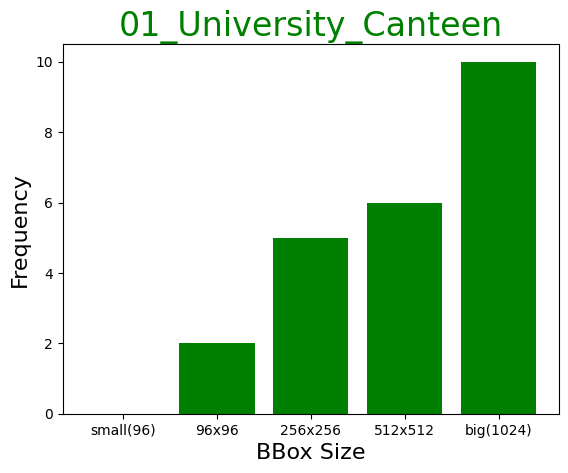

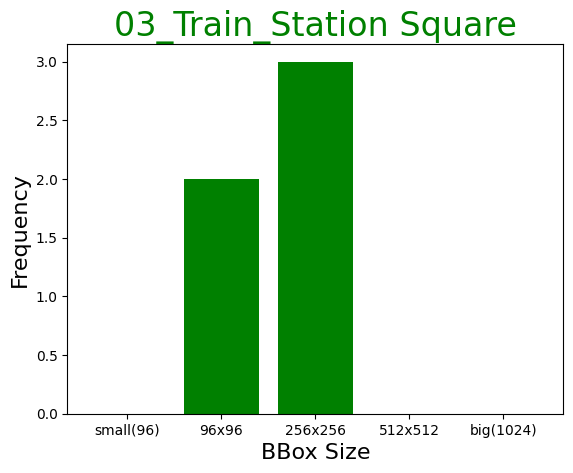

In [9]:
for val, key in enumerate(seq_area):
    bbox_distribution(seq_area[key],key)